## Observations and Insights 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../matplot hw - pymaceuticals/Mouse_metadata.csv"
study_results_path = "../matplot hw - pymaceuticals/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mousestudy_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice.
mice_count = mousestudy_merge_df["Mouse ID"]
mice_count = mice_count.drop_duplicates()
mice_count.count()

249

In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mousestudy_merge_df.duplicated()
dup1 = mousestudy_merge_df[mousestudy_merge_df.duplicated("Mouse ID")]
dup2 = dup1[dup1.duplicated("Timepoint")]
dup2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0


In [89]:
# Optional: Get all the data for the duplicate mouse ID. 



In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedms_df = mousestudy_merge_df.drop_duplicates(subset=['Mouse ID'])
cleanedms_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [91]:
# Checking the number of mice in the clean DataFrame.
cleanedms_df.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(cleanedms_df["Drug Regimen"].unique())
# ramicane = cleanedms_df["Tumor Volume (mm3)"].describe()["Ramicane"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_stats = cleanedms_df.groupby(["Drug Regimen"]).var()
drug_stats


['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,61.623333,8.193333,0.0,0.0,0.0
Ceftamin,65.833333,2.833333,0.0,0.0,0.0
Infubinol,55.416667,4.726667,0.0,0.0,0.0
Ketapril,41.876667,3.493333,0.0,0.0,0.0
Naftisol,50.023333,2.356667,0.0,0.0,0.0
Placebo,43.393333,3.790000,0.0,0.0,0.0
Propriva,51.693333,2.940000,0.0,0.0,0.0
Ramicane,38.973333,11.250000,0.0,0.0,0.0
Stelasyn,59.331522,2.809783,0.0,0.0,0.0


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [119]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_bar = mousestudy_merge_df.groupby(["Drug Regimen"]).sum()
drug_timepoints = drug_bar[["Timepoint"]]


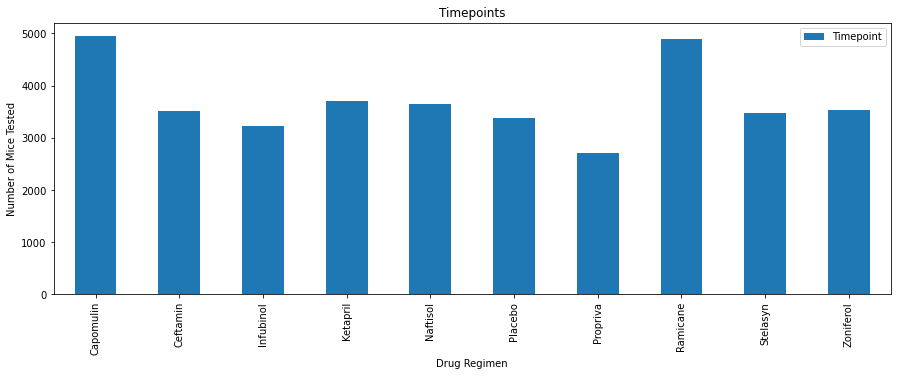

In [120]:
drug_timepoints.plot(kind="bar", figsize=(15,5))
plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

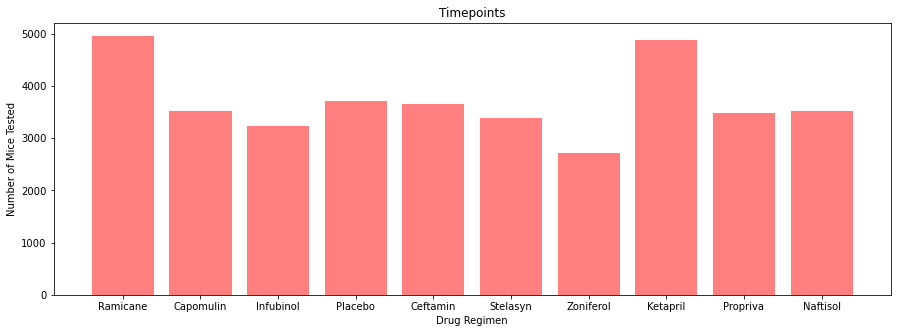

In [121]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(10)
plt.figure(figsize=(15,5))
plt.bar(x_axis, drug_bar["Timepoint"], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Ketapril", "Propriva", "Naftisol"])
plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

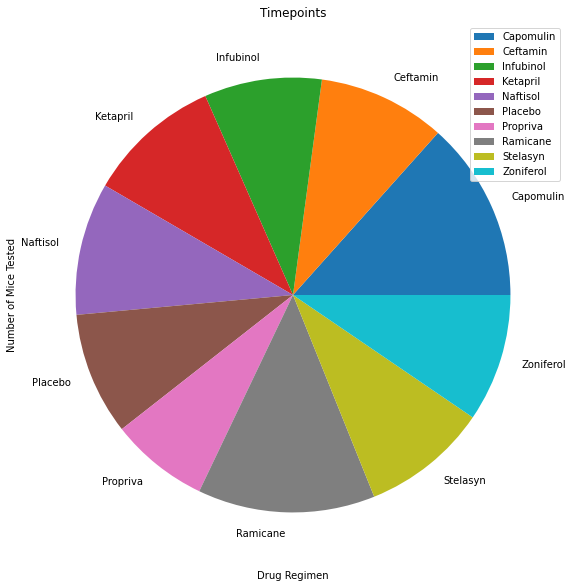

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_timepoints.plot(kind="pie", subplots=True, figsize=(10,10))

plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


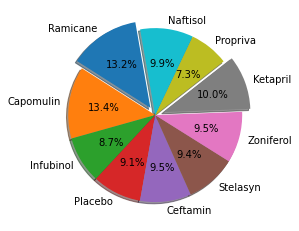

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn',
 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
explode = (0.1,0,0,0,0,0,0,0.1,0,0)
tp = [4885, 4960, 3235, 3380, 3515, 3480, 3525, 3705, 2715, 3650]
plt.pie(tp, explode=explode, labels=labels, shadow=True, startangle=100, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol = mousestudy_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol = tumor_vol.groupby(["Drug Regimen"]).sum()
tumor_vol = tumor_vol.loc[tumor_vol[:, "Drug Regimen"]]
tumor_vol
# tumor_vol["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


TypeError: '(slice(None, None, None), 'Drug Regimen')' is an invalid key

In [100]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
